# Exercício da Aula 2

O objetivo deste exercício é aplicar técnicas de Feature Engineering para transformar e melhorar a qualidade dos dados, com foco em variáveis categóricas e numéricas. Os alunos trabalharão com um dataset de Pedidos de Compras e serão desafiados a realizar as seguintes atividades:

- Análise Exploratória de Dados (EDA) - Básica:
    - Visualização e Sumarização: Visualize as primeiras linhas do dataset e utilize o método df.info() para entender a estrutura dos dados. Calcule estatísticas descritivas básicas, como média, desvio padrão, valores máximos e mínimos para as variáveis numéricas (Income, PurchaseAmount, Age, etc.). Analise a distribuição das variáveis categóricas (Gender, ProductCategory, MaritalStatus).
 
- Técnicas de Encoding para Variáveis Categóricas:
    - One-Hot Encoding: Aplique One-Hot Encoding nas variáveis Gender, ProductCategory, EducationLevel, e EmploymentStatus. Analise como a transformação altera a estrutura do dataset.
    - Ordinal Encoding: Aplique Ordinal Encoding na variável MaritalStatus para transformá-la em valores numéricos (Single, Married, Divorced). Explique a razão para escolher essa técnica para esta variável.
    - Binary Encoding: Aplique Binary Encoding na variável Country. Discuta as vantagens de usar Binary Encoding em variáveis com cardinalidade relativamente alta.

- Técnicas de Discretização para Variáveis Numéricas:
    - Equal Width Binning: Aplique Equal Width Binning na variável Income para criar faixas de renda. Visualize a nova distribuição das faixas usando gráficos de histogramas.
    - Equal Frequency Binning: Aplique Equal Frequency Binning na variável PurchaseAmount para criar bins com frequências iguais. Compare a distribuição resultante com a anterior.
    - K-Means Clustering: Aplique K-Means Clustering na variável PurchaseAmount e verifique como os clusters formados podem ser interpretados em termos de comportamento de compra.

- Criação de Features Derivadas:
    - Feature Crossing: Crie uma nova feature combinando Age e Income (Age_Income_Cross). Explique como a interação entre essas variáveis pode fornecer insights adicionais sobre o perfil de clientes.
    - Feature Transformation: Aplique uma transformação logarítmica na variável PurchaseAmount para reduzir a assimetria da distribuição. Compare a distribuição antes e depois da transformação.

- Documentação e Relatório:
    - Relatório: Documente todos os passos seguidos, as decisões tomadas, e as descobertas realizadas. Inclua gráficos e tabelas relevantes para suportar suas conclusões. Discuta as implicações das transformações de features na análise final.

# Dataset "Pedidos de Compras"

Este dataset contém informações sobre clientes de uma loja online, incluindo dados demográficos e detalhes de compras que podem ser usados para prever o comportamento de compra dos consumidores.

- Principais Características do Dataset:
    - Age: Idade do cliente (em anos).
    - Gender: Gênero do cliente (Masculino, Feminino).
    - Income: Renda anual do cliente (em dólares).
    - MaritalStatus: Estado civil do cliente (Single, Married, Divorced).
    - ProductCategory: Categoria do produto adquirido (Electronics, Clothing, Groceries, etc.).
    - PurchaseAmount: Valor da compra realizada (em dólares).
    - EducationLevel: Nível de escolaridade do cliente (High School, Bachelor’s Degree, Master’s Degree, etc.).
    - EmploymentStatus: Situação de emprego do cliente (Employed, Unemployed, Student, Retired).
    - Country: País de origem do cliente.
    - PurchaseFrequency: Número de compras realizadas no último ano.
    - CustomerLoyalty: Indicador de fidelidade do cliente (1 = Cliente fiel, 0 = Novo cliente).

- Importância das Variáveis:
    - Age: A idade do cliente pode ser um fator importante na segmentação do público e nos padrões de compra.
    - Gender: O gênero pode ajudar a identificar preferências de produtos e categorias entre homens e mulheres.
    - Income: A renda anual é um indicador crucial para prever o comportamento de compra, especialmente em produtos de maior valor.
    - MaritalStatus: O estado civil pode influenciar os hábitos de consumo, especialmente em relação a categorias de produtos para famílias.
    - ProductCategory: A categoria do produto ajuda a entender as preferências de compra e pode ser usada para direcionar campanhas de marketing.
    - PurchaseAmount: O valor da compra é a variável chave para prever o comportamento de compra e gerar insights sobre os gastos dos clientes.
    - EducationLevel: O nível de escolaridade pode estar relacionado a decisões de compra mais informadas e a preferências de produtos específicos.
    - EmploymentStatus: A situação de emprego pode influenciar a frequência de compras e o valor gasto por cliente.
    - Country: O país de origem dos clientes permite analisar padrões de compras regionais e adequar estratégias de marketing.
    - PurchaseFrequency: A frequência de compras mostra a lealdade do cliente e ajuda a identificar padrões de compra recorrentes.
    - CustomerLoyalty: O nível de fidelidade do cliente é uma métrica importante para avaliar a retenção e a satisfação dos consumidores.

# 1 Importação das Bibliotecas Necessárias

In [2]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 4.2 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.cluster import KMeans
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Carregar o dataset

In [4]:
df = pd.read_csv('datasets/purchase_orders.csv')

# 3 Análise Exploratória de Dados (EDA) - Básica

## 3.1 Sumarização Estatística

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   Country               1000 non-null   object 
 4   Income                1000 non-null   int64  
 5   ProductCategory       1000 non-null   object 
 6   PurchaseAmount        1000 non-null   float64
 7   MaritalStatus         1000 non-null   object 
 8   EducationLevel        1000 non-null   object 
 9   EmploymentStatus      1000 non-null   object 
 10  NumPurchases          1000 non-null   int64  
 11  CustomerLoyaltyScore  1000 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB


In [6]:
print("\n### Estatísticas Descritivas ###")
df.describe()


### Estatísticas Descritivas ###


,CustomerID,Age,Income,PurchaseAmount,NumPurchases,CustomerLoyaltyScore
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,64337.967000,254.589030,9.978000,5.41900
std,288.819436,14.99103,20223.368718,140.885104,5.373303,2.98133
min,1.000000,18.00000,30138.000000,10.090000,1.000000,1.00000
25%,250.750000,31.00000,47072.500000,133.852500,6.000000,3.00000
50%,500.500000,44.00000,63496.500000,257.110000,10.000000,5.00000
75%,750.250000,56.00000,81663.500000,378.572500,15.000000,8.00000
max,1000.000000,69.00000,99785.000000,498.840000,19.000000,10.00000


# 4 Técnicas de Encoding para Variáveis Categóricas

## 4.1 One-Hot Encoding

In [7]:
# Aplicar One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['Gender', 'ProductCategory', 'EducationLevel', 'EmploymentStatus'])

In [8]:
# Mostrar as primeiras linhas do DataFrame com One-Hot Encoding
df_one_hot.head()

,CustomerID,Age,Country,Income,PurchaseAmount,MaritalStatus,NumPurchases,CustomerLoyaltyScore,Gender_Female,Gender_Male,...,ProductCategory_Electronics,ProductCategory_Home,ProductCategory_Toys,EducationLevel_Bachelor,EducationLevel_High School,EducationLevel_Master,EducationLevel_PhD,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,1,56,USA,85922,181.47,Single,16,5,False,True,...,False,True,False,True,False,False,False,False,True,False
1,2,69,Canada,78231,465.35,Single,13,4,False,True,...,True,False,False,False,False,True,False,False,True,False
2,3,46,Canada,59301,195.82,Divorced,18,4,False,True,...,False,False,True,True,False,False,False,True,False,False
3,4,32,USA,92711,417.37,Married,14,4,True,False,...,True,False,False,True,False,False,False,True,False,False
4,5,60,Canada,71323,422.74,Married,18,9,False,True,...,False,False,False,True,False,False,False,False,False,True


## 4.2 Ordinal Encoding

In [9]:
# Copiar dataset
df_one_hot_ordinal = df_one_hot

# Aplicar Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Single', 'Married', 'Divorced']])
df_one_hot_ordinal['MaritalStatus_Ordinal'] = ordinal_encoder.fit_transform(df_one_hot_ordinal[['MaritalStatus']])
df_one_hot_ordinal = df_one_hot_ordinal.drop(columns=['MaritalStatus'])


In [11]:
# Mostrar as primeiras linhas do DataFrame com Ordinal Encoding
df_one_hot_ordinal['MaritalStatus_Ordinal']

0      0.0
1      0.0
2      2.0
3      1.0
4      1.0
      ... 
995    0.0
996    2.0
997    1.0
998    2.0
999    0.0
Name: MaritalStatus_Ordinal, Length: 1000, dtype: float64

## 4.3 Binary Encoding

In [12]:
# Aplicar Binary Encoding
binary_encoder = ce.BinaryEncoder(cols=['Country'])
df_one_hot_ordinal_binary = binary_encoder.fit_transform(df_one_hot_ordinal)

In [14]:
# Mostrar as primeiras linhas do DataFrame com Binary Encoding
df_one_hot_ordinal_binary.head()

,CustomerID,Age,Country_0,Country_1,Income,PurchaseAmount,NumPurchases,CustomerLoyaltyScore,Gender_Female,Gender_Male,...,ProductCategory_Home,ProductCategory_Toys,EducationLevel_Bachelor,EducationLevel_High School,EducationLevel_Master,EducationLevel_PhD,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,MaritalStatus_Ordinal
0,1,56,0,1,85922,181.47,16,5,False,True,...,True,False,True,False,False,False,False,True,False,0.0
1,2,69,1,0,78231,465.35,13,4,False,True,...,False,False,False,False,True,False,False,True,False,0.0
2,3,46,1,0,59301,195.82,18,4,False,True,...,False,True,True,False,False,False,True,False,False,2.0
3,4,32,0,1,92711,417.37,14,4,True,False,...,False,False,True,False,False,False,True,False,False,1.0
4,5,60,1,0,71323,422.74,18,9,False,True,...,False,False,True,False,False,False,False,False,True,1.0


# 5 Técnicas de Discretização para Variáveis Numéricas

## 5.1 Equal Width Binning

In [15]:
df_encoded = df_one_hot_ordinal_binary

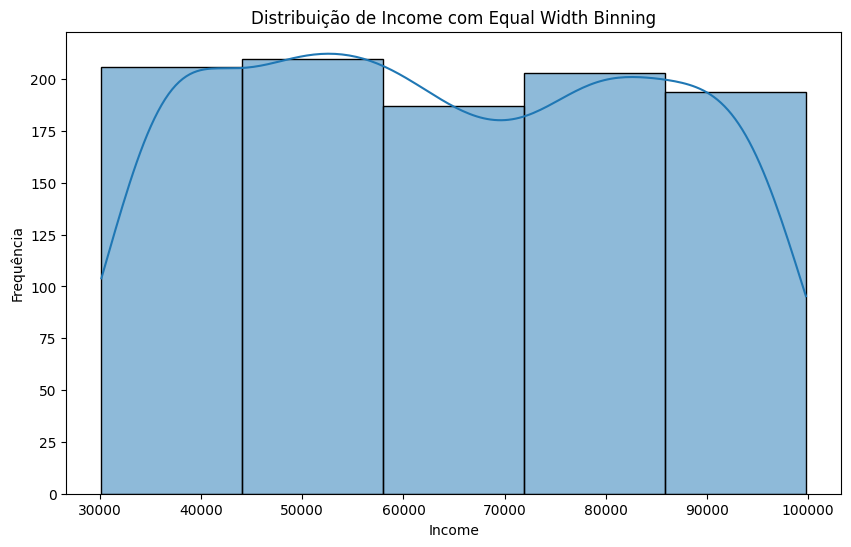

In [16]:
# Visualizar a distribuição de Income e suas bins
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['Income'], bins=5, kde=True)
plt.title('Distribuição de Income com Equal Width Binning')
plt.xlabel('Income')
plt.ylabel('Frequência')
plt.show()

In [18]:
# Copiar dataset
df_encoded_ewb = df_one_hot_ordinal_binary

# Aplicar Equal Width Binning
df_encoded_ewb['Income_Binned'] = pd.cut(df_encoded_ewb['Income'], bins=5, labels=False)

# Mostrar as primeiras linhas do DataFrame com Equal Width Binning
df_encoded_ewb[['Income', 'Income_Binned']].head()

,Income,Income_Binned
0,85922,4
1,78231,3
2,59301,2
3,92711,4
4,71323,2


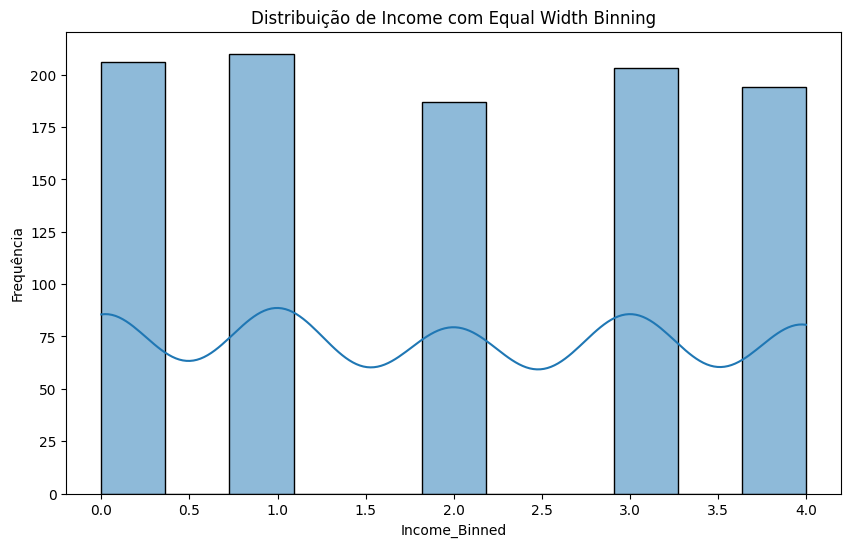

In [16]:
# Visualizar a distribuição de Income e suas bins
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded_ewb['Income_Binned'], kde=True)
plt.title('Distribuição de Income com Equal Width Binning')
plt.xlabel('Income_Binned')
plt.ylabel('Frequência')
plt.show()

## 5.2 Equal Frequency Binning

In [19]:
# Copiar dataset
df_encoded_ewb_fb = df_encoded_ewb

# Aplicar Equal Frequency Binning
df_encoded_ewb_fb['PurchaseAmount_Binned'] = pd.qcut(df_encoded_ewb_fb['PurchaseAmount'], q=5, labels=False)

# Mostrar as primeiras linhas do DataFrame com Equal Frequency Binning
df_encoded_ewb_fb[['PurchaseAmount', 'PurchaseAmount_Binned']].head()

,PurchaseAmount,PurchaseAmount_Binned
0,181.47,1
1,465.35,4
2,195.82,1
3,417.37,4
4,422.74,4


## 5.3 K-Means Clustering

In [20]:
# Copiar dataset
df_encoded_ewb_fb_km = df_encoded_ewb_fb

# Aplicar K-Means Clustering
kmeans = KMeans(n_clusters=5)
df_encoded_ewb_fb_km['PurchaseAmount_Cluster'] = kmeans.fit_predict(df_encoded_ewb_fb_km[['PurchaseAmount']])

# Mostrar as primeiras linhas do DataFrame com K-Means Clustering
df_encoded_ewb_fb_km[['PurchaseAmount', 'PurchaseAmount_Cluster']].head()

,PurchaseAmount,PurchaseAmount_Cluster
0,181.47,4
1,465.35,1
2,195.82,4
3,417.37,1
4,422.74,1


# 6 Criação de Features Derivadas


## 6.1 Feature Crossing

In [21]:
# Copiar dataset
df_feature = df_encoded_ewb_fb_km

# Criar feature derivada: Age x Income
df_feature['Age_Income_Cross'] = df_feature['Age'] * df_feature['Income']

# Mostrar as primeiras linhas do DataFrame com feature crossing
df_feature[['Age', 'Income', 'Age_Income_Cross']].head()

,Age,Income,Age_Income_Cross
0,56,85922,4811632
1,69,78231,5397939
2,46,59301,2727846
3,32,92711,2966752
4,60,71323,4279380


## 6.2 Feature Transformation

In [22]:
# Copiar dataset
df_feature_transformation = df_feature

# Criar feature derivada: Log(PurchaseAmount)
df_feature_transformation['PurchaseAmount_Log'] = np.log1p(df_feature_transformation['PurchaseAmount'])

# Mostrar as primeiras linhas do DataFrame com feature transformation
df_feature_transformation[['PurchaseAmount', 'PurchaseAmount_Log']].head()

,PurchaseAmount,PurchaseAmount_Log
0,181.47,5.206586
1,465.35,6.144936
2,195.82,5.282290
3,417.37,6.036366
4,422.74,6.049120
